___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

In [ ]:
#suni datalarla calisilacak

# Installing Tensorflow

In [1]:
!python --version

Python 3.10.2


In [2]:
# pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
tf.__version__

'2.10.0'

# Keras Syntax Basics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [7]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [8]:
df.head()    #2 feature olusturulmus bunlar random, price a reg yapilacak

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [9]:
df.info()   #hepsi float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


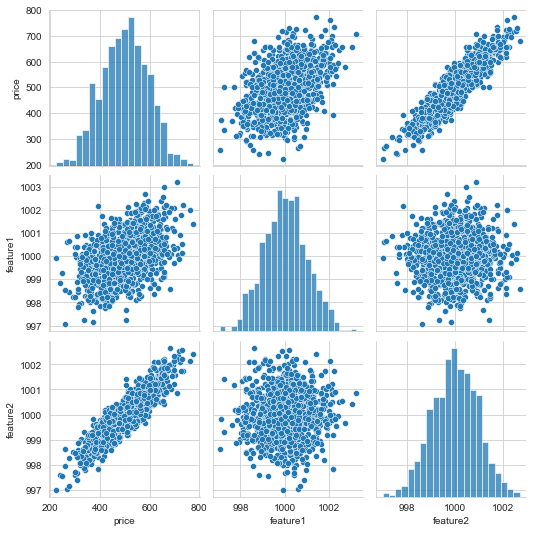

In [11]:
sns.pairplot(df);  #price ile feature2 arasinda linear ve pozitif bir iliski var gibi

In [12]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# X = df[['feature1', 'feature2']].values  # convert to array  #array olarak verir
# y = df['price'].values

In [15]:
X = df[['feature1', 'feature2']] #data frame olarak verir
y = df['price']

In [16]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [17]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [19]:
X_train.shape

(700, 2)

In [20]:
X_test.shape

(300, 2)

In [21]:
from sklearn.preprocessing import MinMaxScaler  #minmax cok daha kullanisli, anlamli
# dummy datalar icin minmax secmek daha anlamli,distance tabanli ise scale yapmak gerekli, gradient descent ten dolayi bir zorunluluk
#decision treelerde bagging, boostinglerde scale e gerek yok

In [22]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [23]:
scaler = MinMaxScaler()

In [24]:
scaler.fit(X_train)   #referans data train o yüzden ona fit yapilir
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [25]:
import tensorflow as tf

In [26]:
from tensorflow.keras.models import Sequential   #seq. modelin türü
from tensorflow.keras.layers import Input,Dense, Activation   #input ve dense layerlar

In [27]:
# help(Sequential)

In [28]:
# help(Dense)

In [29]:
X_train.shape

(700, 2)

In [30]:
# First way to create model   #sequential ardisik demek, bu ilk yolu

model = Sequential([Input(shape = X_train.shape[1]),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])

In [31]:
# Second way to create model (recommended)

model = Sequential()
#model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1])) #1. katman ekleniyor, fully connected layerdaki nöronlarin hepsiyle bagli
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

#shape 1  yani dimension 2 boyutlu olacak, feature sayisi kadar
#bir sonraki layer 4 unitten olusacak
#son satirda act fonk yazilmamissa default u linear dir
#1 tane output layer var, bunlarin hepsi birbirinin nöronlari ile bagli, fully connected
# ögrencinin notlarini tahmin eden programda relu kullanabilirim eksi deger yok cünkü, 0 ile 100 arasi deger bulacak
#model burada olusturuldu
#bunu 4 yaptik ;hidden layer sayisi bizim tercihimiz, 40 olsa parametre sayisi 1000 lere cikacak

In [32]:
model.summary()  #buradaki parametreler 12, 20, 20, 5 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.33696628, -0.00552201,  0.9619696 , -0.72323394],
        [ 0.17895722,  0.25374007, -0.98473644, -0.8901386 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.26881403,  0.33427435,  0.7152496 , -0.6340052 ],
        [ 0.17460209,  0.45434314, -0.7797975 , -0.32543737],
        [-0.3630659 ,  0.73834485,  0.7813223 , -0.84256285],
        [-0.10576552,  0.00944054,  0.69084245, -0.07059062]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.01572835, -0.42322323, -0.81099194, -0.84920496],
        [ 0.41544873,  0.6904598 ,  0.6403261 ,  0.5592211 ],
        [-0.6781049 ,  0.85306925,  0.1696

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [34]:
model.compile(optimizer = "rmsprop", loss = "mse")

In [35]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)  #modeli egitecegiz, batch_size i 2 nin kati secmek tercih ediliyor
#her bir iterasyonda kac raw girecek onu batch_size belirler
#700/32 yaklasik

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 256634.8125
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256477.0781
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256272.0156
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256050.3594
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 255799.9844
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 255511.6406
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255181.3281
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 254803.7188
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 254382.0312
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 253916.5000
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 253409.4219
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

In [ ]:
#random secmek local min , global min meselesinden dolayi farkli sayilar cikabilir
#tekrarlarla en iyi sonuc bulunabilir

In [36]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.9699483 , -0.11509635,  2.2567635 , -0.72323394],
        [ 3.6805155 ,  0.1452235 ,  2.5102444 , -0.8901386 ]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([ 0.6339173 , -0.11577617,  0.6264707 ,  0.        ], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 2.2942202 ,  2.6704202 ,  3.04202   , -0.6340052 ],
        [ 0.15640993,  0.54733074, -0.6771288 , -0.32543737],
        [ 1.3846356 ,  2.5063012 ,  2.565342  , -0.84256285],
        [-0.10576552,  0.00944054,  0.69084245, -0.07059062]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0.35420817, 0.60134375, 0.60797715, 0.        ], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 2.0352345 ,  1.571429  , -1.075349  , -0.86406046],
        [ 2.3916645 ,  2.641405  ,  

In [37]:
model.history.history

{'loss': [256634.8125,
  256477.078125,
  256272.015625,
  256050.359375,
  255799.984375,
  255511.640625,
  255181.328125,
  254803.71875,
  254382.03125,
  253916.5,
  253409.421875,
  252854.515625,
  252254.109375,
  251601.96875,
  250888.890625,
  250108.28125,
  249260.875,
  248339.203125,
  247339.34375,
  246254.875,
  245085.9375,
  243825.25,
  242465.03125,
  241017.734375,
  239456.828125,
  237792.484375,
  236008.28125,
  234107.109375,
  232090.75,
  229955.796875,
  227678.625,
  225269.140625,
  222724.78125,
  220036.59375,
  217204.25,
  214231.078125,
  211103.8125,
  207801.984375,
  204369.9375,
  200783.296875,
  197039.015625,
  193125.96875,
  189053.171875,
  184826.78125,
  180433.171875,
  175875.46875,
  171162.84375,
  166308.578125,
  161297.703125,
  156121.34375,
  150817.8125,
  145361.890625,
  139819.484375,
  134108.4375,
  128311.234375,
  122393.90625,
  116376.09375,
  110298.4921875,
  104181.6484375,
  97984.0,
  91734.2421875,
  85473.20312

In [38]:
pd.DataFrame(model.history.history)

,loss
0,256634.812
1,256477.078
2,256272.016
3,256050.359
4,255799.984
...,...
245,24.413
246,24.100
247,24.509
248,24.321


<AxesSubplot:>

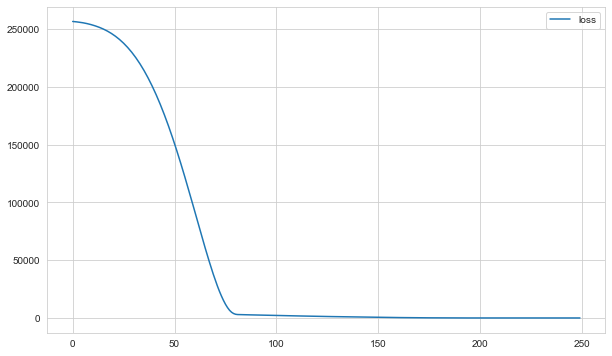

In [39]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

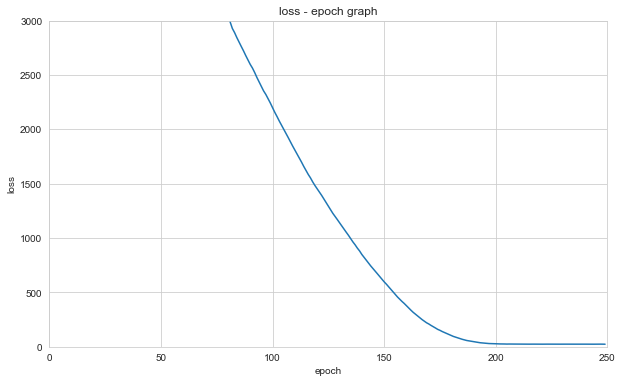

In [40]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
model.evaluate(X_train, y_train, verbose=0)  #mean 500 dü su an +,- % 5 hata ile calisiyor 23 cikti

23.76980972290039

In [43]:
model.evaluate(X_test, y_test, verbose=0)

25.358566284179688

In [44]:
y_pred = model.predict(X_test)
y_pred.shape

10/10 [==============================] - 0s 2ms/step


(300, 1)

In [45]:
y_test.shape

(300,)

In [46]:
y_pred.reshape(-1,).shape  #tek boyuta cevirmek icin böyle yazdik

(300,)

In [47]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
298,511.367,512.902
514,633.473,635.776
800,492.873,493.991
196,491.551,497.095
986,423.655,428.280
192,556.612,556.865
697,498.190,499.017
899,429.215,437.739
381,519.326,523.290
371,375.138,382.866


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

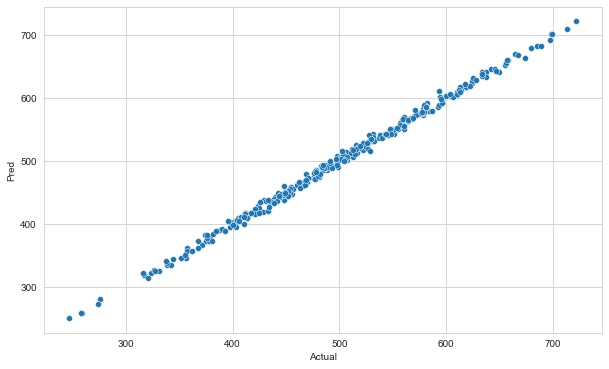

In [48]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [49]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [50]:
eval_metric(y_test, y_pred)   #modelin sonucu gayet iyi

r2_score: 0.9971157328049228 
mae: 4.051063306507834 
mse: 25.358568510629887 
rmse: 5.035729193535916


## Final Model and Model Deployment

### Final Model Training

In [ ]:
#egitim bitti ,fit ve  evaluate ettik, over fitting olmadigini gördük

In [51]:
scaler = MinMaxScaler().fit(X)

In [52]:
import pickle  #pickle tursu demek, modelin tursusunu kurup bir kenara sakliyoruz, dump; bosaltmak demek
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))  #scaler klasöre bosaltiliyor
#önce fit yapip sonra scale yapiliyor
#wb : yazilabilir ve binary olarak yaz diyoruz
#scaler_fake_reg i kuduk

In [53]:
X_scaled = scaler.transform(X)

In [54]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))  # input_dim = 2 or input_dim = X_train.shape[1], zaten x_scale i fit edince feature sayisini alir
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)
#fit yaptiktan sonra icine boyut yazilmasa da summary ve weight i verir ama fit yapilmadan yapilirsa summary ve weight  hata verir

Epoch 1/250
32/32 [==============================] - 1s 1ms/step - loss: 257433.5469
Epoch 2/250
32/32 [==============================] - 0s 1ms/step - loss: 257317.9219
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 257166.1406
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 256965.9688
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 256713.7188
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 256393.8281
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 255998.2500
Epoch 8/250
32/32 [==============================] - 0s 1ms/step - loss: 255526.1719
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 254969.9375
Epoch 10/250
32/32 [==============================] - 0s 1ms/step - loss: 254329.2031
Epoch 11/250
32/32 [==============================] - 0s 1ms/step - loss: 253585.7812
Epoch 12/250
32/32 [==============================] - 0s 1ms/st

### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).



In [55]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [56]:
#final_model.save("model_fake_reg")  #kaydedilmis modeli geri cagirdik

### Loading Model

In [57]:
from tensorflow.keras.models import load_model

In [58]:
model_fake_reg = load_model('model_fake_reg.h5')

In [59]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [60]:
sample = [[998, 1000]]

In [61]:
sample_scaled = scaler_fake_reg.transform(sample)

In [62]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 89ms/step


array([[418.58218]], dtype=float32)

## Prediction-2

In [63]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [64]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [65]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [66]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 36ms/step


array([[378.54123],
       [330.2797 ],
       [282.01816],
       [233.75668],
       [182.27979]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___